#### Import libraries

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import datasets
from sklearn.feature_selection import RFE
from time import time
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
credit_card = pd.read_csv(r'\Credit_Card_afterFeatureSelection.csv')

# remove additional index column 
credit_card = credit_card.drop(['Unnamed: 0'], axis=1)

credit_card

,GENDER,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT4,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2,0.012658,2,1,24,2,2,-1,-1,0,0,0.122080,0.000000,0.005698,0.000000,0.000000,0.000000,0.000000,1
1,2,0.139241,2,2,26,-1,2,0,0,0,2,0.129971,0.000000,0.008269,0.010753,0.012048,0.000000,0.021277,1
2,2,0.101266,2,2,34,0,0,0,0,0,0,0.156644,0.017250,0.012404,0.010753,0.012048,0.012341,0.053191,0
3,2,0.050633,2,1,37,0,0,0,0,0,0,0.190369,0.022728,0.016696,0.012903,0.013253,0.013192,0.010638,0
4,1,0.050633,2,1,57,-1,0,-1,0,0,0,0.172584,0.022728,0.303332,0.107527,0.108434,0.008503,0.007223,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28662,1,0.265823,3,1,39,0,0,0,0,0,0,0.334334,0.096593,0.165389,0.053796,0.036711,0.061704,0.010638,0
28663,1,0.177215,3,2,43,-1,-1,-1,-1,0,0,0.143736,0.020875,0.029158,0.096753,0.001554,0.000000,0.000000,0
28664,1,0.025316,2,2,37,4,3,2,-1,0,0,0.172435,0.000000,0.000000,0.236559,0.050602,0.024682,0.032979,1
28665,1,0.088608,3,1,41,1,-1,0,0,0,-1,0.249364,0.976159,0.028191,0.012667,0.023205,0.653618,0.019191,1


## Logistic Regression Model

In [3]:
# Define X and y 
y = credit_card.iloc[:,18] 
X = credit_card.iloc[:,0:18] 

# split the dataset 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

# train the model
logR=LogisticRegression()
logR.fit(X_train,y_train)
y_predict=logR.predict(X_valid)

# Train and Test Accuracy   
print("Train Accuracy :: ", accuracy_score(y_train, logR.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(y_valid, y_predict))

# calculation of f1 score
print("F1 score  :: ", f1_score(y_valid, y_predict))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Accuracy ::  0.8117559848253608
Test Accuracy  ::  0.8031042901988141
F1 score  ::  0.39005942733657484


### Optimizing model's parameters

In [4]:
# Look at the parameters used by our current forest
print('Parameters currently in use:\n')
print(logR.get_params())

Parameters currently in use:

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


<img src="./LOGR Model Tunning.JPG" width="1000" height="1000" />

<img src="./LOGR Model Tunning_Output.JPG" width="1000" height="1000" />

Since the best combination is as shown above (the default parameters), no change in parameters is required.

### Feature reduction to further improve model's performance

In [5]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression(solver='liblinear')

# create the RFE model and select 1 attributes
rfe = RFE(model,1)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
print(rfe.ranking_)
print()
print(credit_card.columns)

[12  3 17 10 18  6 14  9 16 11 15 13  2  1  4  8  5  7]

Index(['GENDER', 'LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT4', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


#### Drop AGE (lowest rfe ranking)

In [6]:
credit_card1 = credit_card.drop(['AGE'], axis=1)

# Define X and y 

y = credit_card1.iloc[:,17] 
X = credit_card1.iloc[:,0:17] 

# split the dataset 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

logR = LogisticRegression(solver='liblinear')
logR.fit(X_train, y_train)
y_predict = logR.predict(X_valid)

# calculation of accuracy score
print("Train Accuracy ::", accuracy_score(y_train, logR.predict(X_train)))
print("Test Accuracy  ::", accuracy_score(y_valid, y_predict))

# calculation of f1 score
print("F1 score  :: ", f1_score(y_valid, y_predict))

Train Accuracy :: 0.8115815636855187
Test Accuracy  :: 0.8025810952214859
F1 score  ::  0.38545059717698155


#### Slight decrease in both accuracy and F1 score is observed, hence we decided to not drop any features.

### Resampling to improve F1 score

Since our dataset is highly skewed, due to only 23% of default payment status = 1, we decided to conduct resampling to improve the class imbalance.
- We will not be trying downsampling of the majority class as that will lead to loss of a large number of data points.

We will be conducting resampling on our training dataset, hence we will be conducting resampling after splitting. We will be upsampling our minority class (Default Payment Status = 1) such that Default Payment Status = 0 and 1 has the same number of datapoints.

Reason for conducting upsampling of ONLY our training set: To avoid having the same exact observations (since resampling() works by duplication of data points) in our training set and testing set which can lead to high accuracy score for our dataset but poor accuracy when our algorithm is put to work since the model can simply memorize the specific data points in our dataset.

In [7]:
# Define X and y 
y = credit_card.iloc[:,18] 
X = credit_card.iloc[:,0:18] 

# split the dataset 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [8]:
# obtain the training set 
X_train = pd.DataFrame(X_train)
X_train = X_train.reset_index()
X_train = X_train.drop(['index'],axis=1)

y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index()
y_train = y_train.drop(['index'],axis=1)

training_set = pd.concat([X_train, y_train], axis=1)
training_set

,GENDER,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT4,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2,0.291139,2,1,42,-1,-1,-1,-1,-1,-1,0.123604,0.000000,0.002613,0.006796,0.000000,0.003900,0.010085,0
1,2,0.164557,2,1,26,0,0,0,2,2,2,0.198618,0.227278,0.024899,0.000000,0.036145,0.000000,0.053191,0
2,2,0.443038,1,2,30,0,0,0,0,0,0,0.122080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,1,0.025316,2,1,49,0,0,2,2,0,0,0.160407,0.041933,0.008269,0.000000,0.007096,0.009330,0.015957,0
4,2,0.227848,2,1,34,1,0,0,0,0,0,0.122036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22928,2,0.000000,2,2,28,0,0,0,0,0,-1,0.145865,0.013955,0.008269,0.002118,0.019241,0.017647,0.012596,0
22929,1,0.189873,2,2,30,0,0,0,0,0,0,0.347269,0.085695,0.045482,0.045161,0.036530,0.049363,0.027755,0
22930,2,0.025316,3,1,35,0,0,0,0,0,0,0.176431,0.034092,0.025652,0.032344,0.037783,0.013612,0.000000,0
22931,1,0.012658,2,1,45,4,3,2,0,0,0,0.169352,0.000000,0.000000,0.000000,0.000000,0.004936,0.000000,0


In [9]:
# Separate majority and minority classes
training_set_majority = training_set[training_set['default payment next month'] == 0]
training_set_minority = training_set[training_set['default payment next month'] == 1]

# Upsample minority class
training_set_minority_upsampled = resample(training_set_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=17789,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
credit_card_upsampled = pd.concat([training_set_majority, training_set_minority_upsampled])
 
# Display new class counts
credit_card_upsampled['default payment next month'].value_counts()

1    17789
0    17789
Name: default payment next month, dtype: int64

In [10]:
# Redefine X_train and y_train
y_train = credit_card_upsampled.iloc[:,18]
X_train = credit_card_upsampled.iloc[:,0:18]

# train the model
logR = LogisticRegression(solver='liblinear')
logR.fit(X_train, y_train)
y_predict = logR.predict(X_valid)

# calculation of accuracy score 
print("Train Accuracy :", accuracy_score(y_train, logR.predict(X_train)))
print("Test Accuracy  : ", accuracy_score(y_valid, y_predict))

# calculation of F1 score
print("F1 score  :: ", f1_score(y_valid, y_predict))

Train Accuracy : 0.6953735454494351
Test Accuracy  :  0.7343913498430416
F1 score  ::  0.5047154471544716


Drop in accuracy level by approx. 12% and increase in f1_score by approx. 12%.

### Model Evaluation

In [11]:
print("Train Accuracy : ", accuracy_score(y_train, logR.predict(X_train)))
print("Test Accuracy  : ", accuracy_score(y_valid, y_predict))
print("F1 score  :: ", f1_score(y_valid, y_predict))

Train Accuracy :  0.6953735454494351
Test Accuracy  :  0.7343913498430416
F1 score  ::  0.5047154471544716


In [12]:
start = time()
logR = LogisticRegression(solver='liblinear')
logR.fit(X_train, y_train)
end = time()
print("Trained model in {:.4f} seconds".format(end - start))

Trained model in 0.3817 seconds


In [13]:
start = time()
y_predict = logR.predict(X_valid)
end = time()
print("Made predictions in {:.4f} seconds.".format(end - start))

Made predictions in 0.0040 seconds.


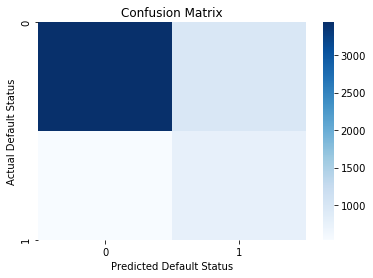

Predicted     0    1
Actual              
0          3435  986
1           537  776


In [14]:
# confusion matrix
ax= plt.subplot()
confusion_matrix = pd.crosstab(y_valid, y_predict, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, cmap="Blues")
    
#change the labels
ax.set_xlabel('Predicted Default Status')
ax.set_ylabel('Actual Default Status')
ax.set_title('Confusion Matrix')
plt.savefig('RFC_confusion_matrix.jpg', bbox_inches="tight")
# save the figure for use in ppt
plt.savefig('LogR_confusion_matrix.jpg')
plt.show()

print(confusion_matrix)

In [15]:
TN = 3435
TP = 776
FN = 537
FP = 986

total = TN + TP + FN + FP
actual0 = TN + FP
actual1 = TP + FN
predicted1 = TP + FP

print("Accuracy: ", (TP+TN)/total)
print("Misclassification Rate: ",(FP+FN)/total)
print("True Positive Rate: ",TP/actual1)
print("False Positive Rate: ",FP/actual0)
print("True Negative Rate (Specificity): ",TN/actual0)
print("Precision: ", TP/predicted1)
print("Prevalence: ", actual1/total)

print()
print(classification_report(y_valid, y_predict))

Accuracy:  0.7343913498430416
Misclassification Rate:  0.2656086501569585
True Positive Rate:  0.591012947448591
False Positive Rate:  0.22302646460076905
True Negative Rate (Specificity):  0.776973535399231
Precision:  0.44040862656072643
Prevalence:  0.22898500174398326

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      4421
           1       0.44      0.59      0.50      1313

    accuracy                           0.73      5734
   macro avg       0.65      0.68      0.66      5734
weighted avg       0.77      0.73      0.75      5734



In [16]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression(solver='liblinear')

# create the RFE model and select 3 attributes
rfe = RFE(model, 1)
rfe = rfe.fit(X_train, y_train)

credit_card_columns = credit_card.columns.tolist()

rfe.ranking_ = rfe.ranking_.tolist()

for i in rfe.ranking_:
    for i in range(1,6):
        print(i, ": ", credit_card_columns[rfe.ranking_.index(i)])
    break

1 :  PAY_AMT2
2 :  PAY_AMT1
3 :  LIMIT_BAL
4 :  PAY_AMT3
5 :  PAY_AMT5


## Random Forest Classifier

In [22]:
# Define X and y 
y = credit_card.iloc[:,18] 
X = credit_card.iloc[:,0:18] 

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_valid)

# Train and Test Accuracy   
print("Train Accuracy :: ", accuracy_score(y_train, rfc.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(y_valid, y_predict))

# calculation of f1 score
print("F1 Score  :: ", f1_score(y_valid, y_predict))

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train Accuracy ::  0.980115990057995
Test Accuracy  ::  0.7961283571677712
F1 Score  ::  0.4140350877192982


### Optimizing model's parameters

In [20]:
# Look at the parameters used by our current forest
print('Parameters currently in use:\n')
print(rfc.get_params())

Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


<img src="./RFC Model Tunning.JPG" width="1000" height="1000" />

<img src="RFC Model Tunning_Output.jpg" width="1000" height="1000" />

We ran the above code to find the best parameters for our model using RandomizedSearchCV. As the kernel kept dying when we ran it in Jupyter, we decided to run it in Python instead. As shown above are the codes we used and the output we obtained.

In [21]:
rfc = RandomForestClassifier(n_estimators = 1000, min_samples_split = 10, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 10, bootstrap = True)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_valid)

# calculation of accuracy score
print("Train Accuracy :", accuracy_score(y_train, rfc.predict(X_train)))
print("Test Accuracy  : ", accuracy_score(y_valid, y_predict))

# calculation of f1 score
print("F1 Score  :: ", f1_score(y_valid, y_predict))

Train Accuracy : 0.8468146339336328
Test Accuracy  :  0.8137425880711545
F1 Score  ::  0.47492625368731567


Increase in both test accuracy and F1 score is observed (especially F1 score).

### Feature reduction to further improve model's performance

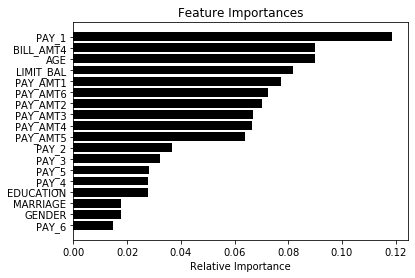

In [25]:
features = ['GENDER', 'LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT4', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Drop PAY_6 (lowest relative importance value)

In [26]:
credit_card1 = credit_card.drop(['PAY_6'], axis=1)

# Define X and y 
y = credit_card1.iloc[:,17] 
X = credit_card1.iloc[:,0:17] 

# split the dataset 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

rfc = RandomForestClassifier(n_estimators = 1000, min_samples_split = 10, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 10, bootstrap = True)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_valid)

# calculation of acurracy score
print("Train Accuracy :", accuracy_score(y_train, rfc.predict(X_train)))
print("Test Accuracy  : ", accuracy_score(y_valid, y_predict))

# calculation of f1 score
print("F1 Score  :: ", f1_score(y_valid, y_predict))

Train Accuracy : 0.8484280294771727
Test Accuracy  :  0.8128705964422741
F1 Score  ::  0.46802181457610315


#### Since a drop in both accuracy and F1 score is observed when we perform feature reduction, we decided to not drop any columns.

### Resampling to improve F1 score

In [27]:
# Define X and y 
y = credit_card.iloc[:,18] 
X = credit_card.iloc[:,0:18] 

# split the dataset 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

# obtain the training set 

X_train = pd.DataFrame(X_train)
X_train = X_train.reset_index()
X_train = X_train.drop(['index'],axis=1)

y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index()
y_train = y_train.drop(['index'],axis=1)

training_set = pd.concat([X_train, y_train], axis=1)
training_set

,GENDER,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT4,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2,0.291139,2,1,42,-1,-1,-1,-1,-1,-1,0.123604,0.000000,0.002613,0.006796,0.000000,0.003900,0.010085,0
1,2,0.164557,2,1,26,0,0,0,2,2,2,0.198618,0.227278,0.024899,0.000000,0.036145,0.000000,0.053191,0
2,2,0.443038,1,2,30,0,0,0,0,0,0,0.122080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,1,0.025316,2,1,49,0,0,2,2,0,0,0.160407,0.041933,0.008269,0.000000,0.007096,0.009330,0.015957,0
4,2,0.227848,2,1,34,1,0,0,0,0,0,0.122036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22928,2,0.000000,2,2,28,0,0,0,0,0,-1,0.145865,0.013955,0.008269,0.002118,0.019241,0.017647,0.012596,0
22929,1,0.189873,2,2,30,0,0,0,0,0,0,0.347269,0.085695,0.045482,0.045161,0.036530,0.049363,0.027755,0
22930,2,0.025316,3,1,35,0,0,0,0,0,0,0.176431,0.034092,0.025652,0.032344,0.037783,0.013612,0.000000,0
22931,1,0.012658,2,1,45,4,3,2,0,0,0,0.169352,0.000000,0.000000,0.000000,0.000000,0.004936,0.000000,0


In [28]:
training_set['default payment next month'].value_counts()

0    17789
1     5144
Name: default payment next month, dtype: int64

In [31]:
# Separate majority and minority classes
training_set_majority = training_set[training_set['default payment next month'] == 0]
training_set_minority = training_set[training_set['default payment next month'] == 1]

# Upsample minority class
training_set_minority_upsampled = resample(training_set_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=17789,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
credit_card_upsampled = pd.concat([training_set_majority, training_set_minority_upsampled])
 
# Display new class counts
credit_card_upsampled['default payment next month'].value_counts()

1    17789
0    17789
Name: default payment next month, dtype: int64

In [32]:
# Redefine X_train and y_train

y_train = credit_card_upsampled.iloc[:,18]
X_train = credit_card_upsampled.iloc[:,0:18]

# train the model
rfc = RandomForestClassifier(n_estimators = 1000, min_samples_split = 10, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 10, bootstrap = True)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_valid)

# calculation of accuracy score
print("Train Accuracy :", accuracy_score(y_train, rfc.predict(X_train)))
print("Test Accuracy  : ", accuracy_score(y_valid, y_predict))

# calculation of f1 score
print("F1 Score  :: ", f1_score(y_valid, y_predict))

Train Accuracy : 0.7799763899038732
Test Accuracy  :  0.7785141262643879
F1 Score  ::  0.5358187134502924


Drop in accuracy level by approx. 7% and increase in f1_score by approx. 7%.

### Model Evaluation

In [33]:
# calculation of accuracy score
print("Train Accuracy :", accuracy_score(y_train, rfc.predict(X_train)))
print("Test Accuracy  : ", accuracy_score(y_valid, y_predict))

# calculation of f1 score
print("F1 Score  :: ", f1_score(y_valid, y_predict))

Train Accuracy : 0.7799763899038732
Test Accuracy  :  0.7785141262643879
F1 Score  ::  0.5358187134502924


In [34]:
start = time()
rfc = RandomForestClassifier(n_estimators = 1000, min_samples_split = 10, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 10, bootstrap = True)
rfc.fit(X_train, y_train)
end = time()
print("Trained model in {:.4f} seconds".format(end - start))

Trained model in 34.1752 seconds


In [35]:
start = time()
y_predict = rfc.predict(X_valid)
end = time()
print("Made predictions in {:.4f} seconds.".format(end - start))

Made predictions in 0.9056 seconds.


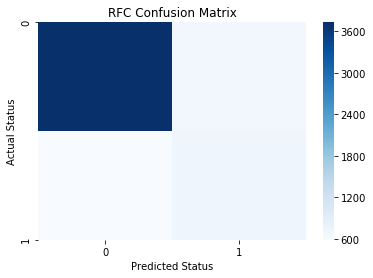

Predicted     0    1
Actual              
0          3729  692
1           585  728


In [36]:
# confusion matrix

ax= plt.subplot()
confusion_matrix = pd.crosstab(y_valid, y_predict, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, cmap="Blues")
    
#change the labels
ax.set_xlabel('Predicted Status')
ax.set_ylabel('Actual Status')
ax.set_title('RFC Confusion Matrix')
plt.savefig('RFC_confusion_matrix.jpg', bbox_inches="tight")
plt.show()

print(confusion_matrix)

In [38]:
TN = 3729
TP = 728
FN = 585
FP = 692

total = TN + TP + FN + FP
actual0 = TN + FP
actual1 = TP + FN
predicted1 = TP + FP

print("Accuracy: ", (TP+TN)/total)
print("Misclassification Rate: ",(FP+FN)/total)
print("True Positive Rate: ",TP/actual1)
print("False Positive Rate: ",FP/actual0)
print("True Negative Rate (Specificity): ",TN/actual0)
print("Precision: ", TP/predicted1)
print("Prevalence: ", actual1/total)

print(classification_report(y_valid, y_predict))

Accuracy:  0.7772933379839554
Misclassification Rate:  0.22270666201604464
True Positive Rate:  0.5544554455445545
False Positive Rate:  0.15652567292467767
True Negative Rate (Specificity):  0.8434743270753223
Precision:  0.5126760563380282
Prevalence:  0.22898500174398326
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4421
           1       0.51      0.55      0.53      1313

    accuracy                           0.78      5734
   macro avg       0.69      0.70      0.69      5734
weighted avg       0.78      0.78      0.78      5734



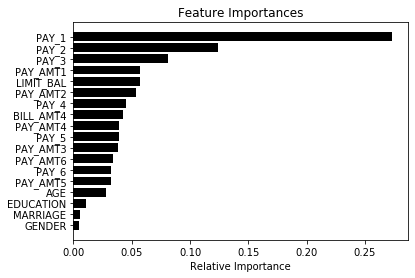

In [39]:
features = ['GENDER', 'LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT4', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('RFC_feature_importance.jpg', bbox_inches="tight")
plt.show()

Top 5 Features: PAY_1, PAY_2, PAY_3, PAY_AMT1, LIMIT_BAL

Based on this model, PAY_1, repayment status of the month before (for September) has the greatest (significantly greater) influence on the default payment status of the following month (for October).